# Machine Learning & Statistics Project 2020
By Kevin Dooley

In [1]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [2]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [4]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [6]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
429,21.496,89.713
1,0.125,0.000
395,19.720,103.629
265,13.388,62.315
66,3.529,5.300
209,10.561,22.758
256,12.788,50.658
391,19.620,91.501
318,16.191,85.173
26,1.076,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0 when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. 

In [8]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59 and the average power output is 48.01.

### Plot Dataset

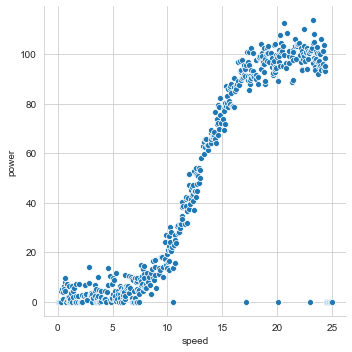

In [26]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

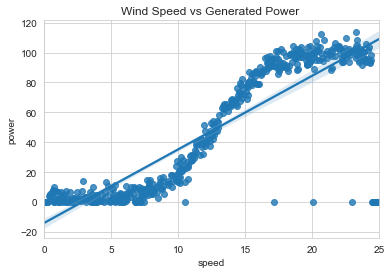

In [27]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

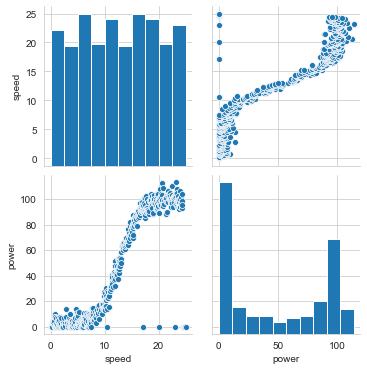

In [40]:
sns.pairplot(df)

The above relationship plots are clearing indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0 when the wind speed is up to 25 which indicates there was downtime either due to a known/unknown issue or maintenance. 

In [41]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [37]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output

### References

1. https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb
2. https://seaborn.pydata.org/generated/seaborn.relplot.html
3. https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series